In [ ]:
!pip install tensorflow==1.14.0

In [ ]:
import json
import os
import pprint
import time

import tensorflow as tf


assert 'COLAB_TPU_ADDR' in os.environ, 'ERROR: Not connected to a TPU runtime; please see the first cell in this notebook for instructions!'
TPU_ADDRESS = 'grpc://' + os.environ['COLAB_TPU_ADDR']
print('TPU address is', TPU_ADDRESS)

from google.colab import auth
auth.authenticate_user()
with tf.Session(TPU_ADDRESS) as session:
  print('TPU devices:')
  pprint.pprint(session.list_devices())

  # Upload credentials to TPU.
  with open('/content/adc.json', 'r') as f:
    auth_info = json.load(f)
  tf.contrib.cloud.configure_gcs(session, credentials=auth_info)
  # Now credentials are set for all future sessions on this TPU.

In [ ]:
!git clone https://github.com/google-research/bert.git

In [10]:
!echo "'what does the golgi apparatus do to the proteins and lipids once they arrive ? ||| start studying bonding, carbs, proteins, lipids. learn vocabulary, terms, and more with flashcards, games, and other study tools. '" > input.txt

In [11]:
cd bert

/content/bert


In [ ]:
#change bert_config_file to get embedding for different tasks 
!python extract_features.py \
  --input_file=../input.txt \
  --output_file=../bert.json \
  --vocab_file="gs://irproject_bert2/uncased_L-24_H-1024_A-16/vocab.txt" \
  --bert_config_file="gs://irproject_bert2/uncased_L-24_H-1024_A-16/bert_config.json" \
  --init_checkpoint="gs://irproject_bert2/ir_bert/model.ckpt-100000" \
  --layers=-1 \
  --max_seq_length=128 \
  --batch_size=8

In [68]:
import json
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")


In [60]:
task_name=['qnli','squad','mnli','mrpc','qqp','bert']
res_list=[]
for i in task_name:
  with open('../'+i+'.json') as f:
    data = json.load(f)
  res_list.append(data['features'][0]['layers'][0]['values'])

In [61]:
final=np.array(res_list)

In [62]:
final.shape

(6, 1024)

In [63]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(final)

In [ ]:
X_embedded

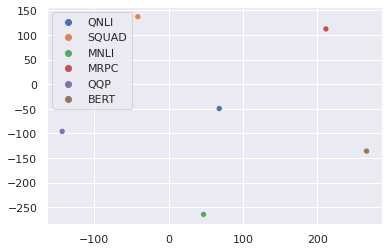

In [71]:
sns_plot=sns.scatterplot(x=X_embedded[:,0],y=X_embedded[:,1],hue=list(map(lambda x: x.upper(),task_name)))


In [73]:
sns_plot.figure.savefig("../output.png")